# Project 4

In this project, you will summarize and present your analysis from Projects 1-3.

### Intro: Write a problem Statement/ Specific Aim for this project

Answer: Discern the correlation between UCLA graduate applicant characteristics and admission. Using an admissions dataset published by UCLA, I will test for the drivers of graduate school admission. The data is hypothetical and generated for the purposes of providing an example for R Data analysis using Logit Regression. The dataset includes four variables ('admit,' 'gre,' 'gpa,' and 'prestige') in which 'admit' is the dependent variable and 'gre,' 'gpa,' and 'prestige' are predictor variables. I believe no single predictor alone can sufficiently predict graduate school admision. My hypothesis is that admission will vary inversely with decreasing undergraduate college prestige and have a positive correlation with gpa and gre, allowing for greater likelihood of admission for students with good scores from prestigious schools.

### Dataset:  Write up a description of your data and any cleaning that was completed

Answer: To begin, we will become familiar with the dataset. To do this, we will plot variable frequency tables to see the data distributions, and test for outliers within the dataset. If we find that the dataset includes outliers that significantly impact the analysis, we will drop the outliers. We will test for outliers by removing any values that are more than three standard deviations away from the mean. We also will remove any rows that have missing values, as to avoid skewing our analyses. Following our test for outliers, we will test for multicollinearity by genearating a correlation matrix. If we find that any of the predictor variables are highly correlated, we will attempt to discern the true impact by dropping one or more of the potential candidates for multicollinearity. This will allow us to more accurately tease out the effects of individual predictors. We also create dummy variables for any categorical data types

### Demo: Provide a table that explains the data by admission status

In [2]:
import pandas as pd
import statsmodels.api as sm

df_raw = pd.read_csv("../assets/admissions.csv")
df = df_raw.dropna()

dummies = pd.get_dummies(df.prestige, prefix='prestige')
df1 = df.join(dummies).drop('prestige', axis=1)

In [3]:
df1.columns

Index([u'admit', u'gre', u'gpa', u'prestige_1.0', u'prestige_2.0',
       u'prestige_3.0', u'prestige_4.0'],
      dtype='object')

In [4]:
print 'gre mean with admit 1:', df1[df1['admit'] == 1]['gre'].mean()
print 'gre mean with admit 0:', df1[df1['admit'] == 0]['gre'].mean()

gre mean with admit 1: 618.571428571
gre mean with admit 0: 573.579335793


In [5]:
print 'gpa mean with admit 1:', df1[df1['admit'] == 1]['gpa'].mean()
print 'gpa mean with admit 0:', df1[df1['admit'] == 0]['gpa'].mean()

gpa mean with admit 1: 3.48920634921
gpa mean with admit 0: 3.34715867159


In [6]:
a = df1[df1['admit'] == 1]['prestige_1.0'].value_counts()
b = df1[df1['admit'] == 1]['prestige_2.0'].value_counts()
c = df1[df1['admit'] == 1]['prestige_3.0'].value_counts()
d = df1[df1['admit'] == 1]['prestige_4.0'].value_counts()

In [7]:
print a
print b
print c
print d

0.0    93
1.0    33
Name: prestige_1.0, dtype: int64
0.0    73
1.0    53
Name: prestige_2.0, dtype: int64
0.0    98
1.0    28
Name: prestige_3.0, dtype: int64
0.0    114
1.0     12
Name: prestige_4.0, dtype: int64


In [8]:
def frequency(x):
    denom = x[0] + x[1]
    admitted_pct = x[1] / float(denom) * 100
    non_admitted_pct = x[0] / float(denom) * 100    
    print admitted_pct
    print non_admitted_pct

In [9]:
values = [a, b, c, d]
prestiges = [1, 2, 3, 4]

for i in values:
    frequency(i)
    print

26.1904761905
73.8095238095

42.0634920635
57.9365079365

22.2222222222
77.7777777778

9.52380952381
90.4761904762



##### Mean (STD) or counts by admission status for each variable 

| Not Admitted | Admitted
---| ---|---
GPA | 3.47 (mean)  | 3.49
GRE | 573.58 (mean) | 618.57
Prestige 1 | 73.81 (%) | 26.19 (%)
Prestige 2 | 57.94 (%) | 42.06 (%)
Prestige 3 |77.78 (%) | 22.22 (%)
Prestige 4 |90.48 (%) | 9.52 (%)

### Methods: Write up the methods used in your analysis

Answer: We first cleaned the dataset by handling null values (first by dropping, then by interpolating). Following this step, we sought to add dummy variables for our categorical variables to remove any coefficient that might be related with a prestige not observed, as well as remove any bias from having a ranked variable (1-4). Once our dataset was prepared, we then trained our logistic model on the complete dataset provided by UCLA, and tested the model on a second user-generated dataset. We then use the model to predict whether or not an applicant will be admitted based on underlying characteristics.

### Results: Write up your results

In [10]:
train_cols = ['gre', 'gpa', 'prestige_2.0', 'prestige_3.0', 'prestige_4.0']
model = sm.Logit(df1['admit'], df1[train_cols])
result = model.fit()

result.summary()

Optimization terminated successfully.
         Current function value: 0.589121
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  admit   No. Observations:                  397
Model:                          Logit   Df Residuals:                      392
Method:                           MLE   Df Model:                            4
Date:                Wed, 10 Aug 2016   Pseudo R-squ.:                 0.05722
Time:                        22:46:35   Log-Likelihood:                -233.88
converged:                       True   LL-Null:                       -248.08
                                        LLR p-value:                 1.039e-05
================================================================================
                   coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
gre              0.0014      0.001      1.308      0.191        -0.001     0.003
gpa             -0.1323      0.195     -0.680      0.497        -0.514     0.249
prestige_2.0    -0.9562      0.302     -3.171      0.002        -1.547    -0.365
prestige_3.0    -1.5375      0.332     -4.627      0.000        -2.189    -0.886
prestige_4.0    -1.8699      0.401     -4.658      0.000        -2.657    -1.083
================================================================================
"""

Answer: From the logistic regression we find that only the dummy variables for prestige are significant at the 5% level. Each prestige 2 through 4 has a negative relationship with admission, increasingly so with decreasing prestige (e.g. going from prestige 2 to prestige 4). GRE and GPA both have confidence intervals that cross the x-axis, and their p stats are non-significant. Holding GPA and GRE, there is an inverse relationship in decreasing prestige (that is, going from prestige 1 to some other prestige) and admission.

### Visuals: Provide a table or visualization of these results

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

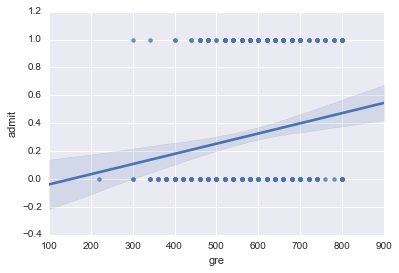

In [12]:
sns.regplot(x=df1['gre'], y=df1['admit'])

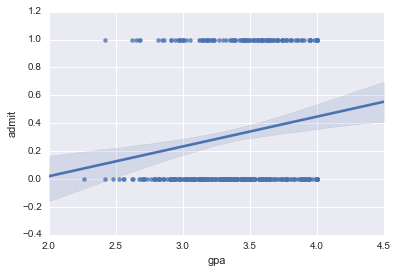

In [13]:
sns.regplot(x=df1['gpa'], y=df1['admit'])

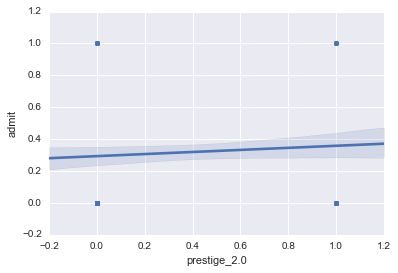

In [14]:
sns.regplot(x=df1['prestige_2.0'], y=df1['admit'])

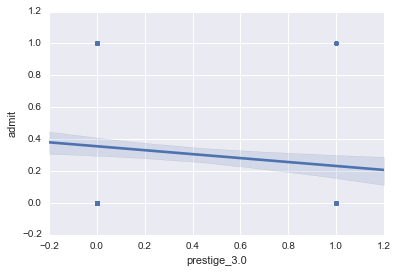

In [15]:
sns.regplot(x=df1['prestige_3.0'], y=df1['admit'])

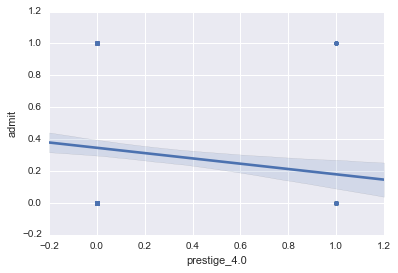

In [16]:
sns.regplot(x=df1['prestige_4.0'], y=df1['admit'])

### Discussion: Write up your discussion and future steps

Answer: From the above graphs it is clear the relationship of our predictors and our target variable. It would be interesting to expand this to other college datasets, and perhaps even get information on the type of graduate program that one is applying to. If we were able to discern the specific scores on each section of the GRE, that would be another interesting datapoint to compare bsaed on the type of program/school someone was admitted to. Since this was not an actual dataset from UCLA's admissions, it would be nice to see a real world example with actual admissions data. Could also try KNN.